In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data =pd.read_csv("/content/gdrive/MyDrive/Google Colab/new_data_analyzed.csv", on_bad_lines='skip')

In [5]:
data.shape

(99999, 28)

In [6]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,decide eat aware going take 2 hour beginning e...,decid eat awar go take 2 hour begin end tri mu...,"['decid', 'eat', 'awar', 'go', 'take', '2', 'h...",45,8,0.166667,3,0.062500,0.198485,0.412121
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,834,...,ive taken lot spin class year nothing compare ...,ive taken lot spin class year noth compar clas...,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",84,18,0.206897,1,0.011494,0.395455,0.571212
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,339,...,family diner buffet eclectic assortment large ...,famili diner buffet eclect assort larg chicken...,"['famili', 'diner', 'buffet', 'eclect', 'assor...",39,6,0.150000,2,0.050000,0.139935,0.522294
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,243,...,wow yummy different delicious favorite lamb cu...,wow yummi differ delici favorit lamb curri kor...,"['wow', 'yummi', 'differ', 'delici', 'favorit'...",24,5,0.208333,2,0.083333,0.315152,0.733838
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,535,...,cute interior owner gave u tour upcoming patio...,cute interior owner gave u tour upcom patioroo...,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",63,12,0.190476,1,0.015873,0.416234,0.490260


In [7]:
# Categorization and Dummy Variables
yelp_data_s = data[data['Polarity'] != 0]
yelp_data_s = yelp_data_s.reset_index()

In [8]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

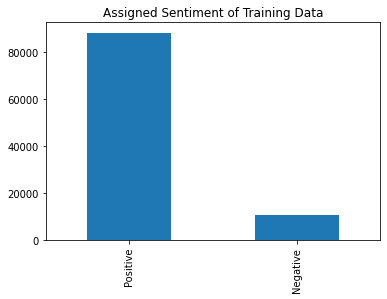

In [9]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [10]:
# sorting more for better results
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] >= 0.4:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] > 0.2 and yelp_data_s['Polarity'][i] < 0.4:
        sentiment.append('Slightly Positive')
    if yelp_data_s['Polarity'][i] <= 0.2 and yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Slightly Negative')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment


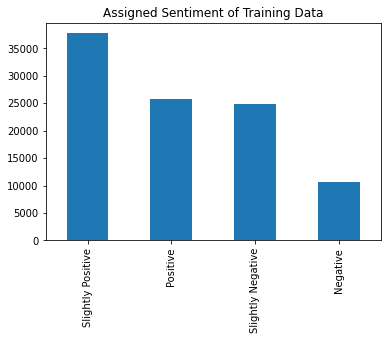

In [11]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [12]:
# features and how they change based on their category
yelp_data_s = yelp_data_s.rename(columns={'Stop_Words_%':'Stop_Words_P'})
yelp_data_s = yelp_data_s.rename(columns={'Positive_Words_%':'Positive_Words_P'})

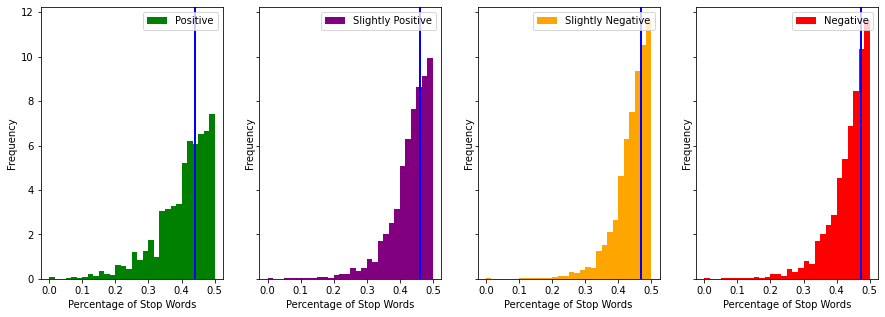

In [13]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Percentage of Stop Words', ylabel='Frequency')
plt.show()

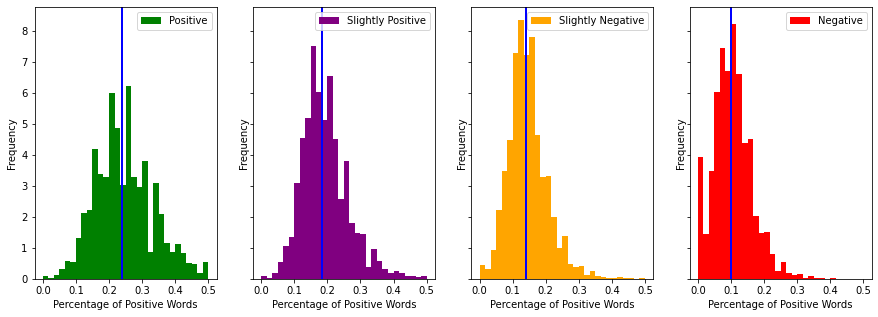

In [14]:
# another feature
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Percentage of Positive Words', ylabel='Frequency')
plt.show()

In [15]:
#another look
print('Positive: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P))
print('Slightly Positive: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P))
print('Slightly Negative: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P))
print('Negative: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P))

Positive:  0.238095238095238
Slightly Positive:  0.1846153846153846
Slightly Negative:  0.13936910084451065
Negative:  0.1


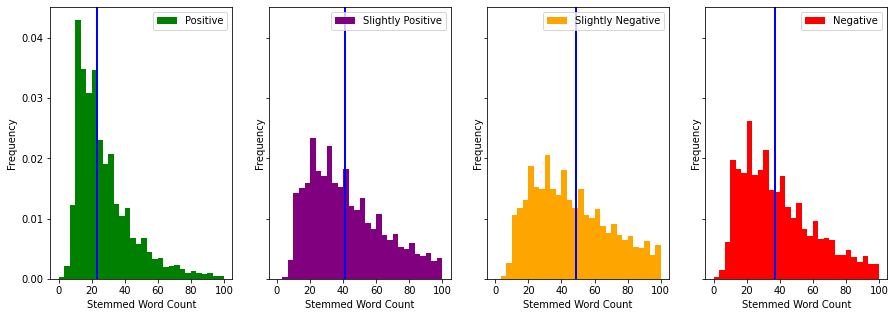

In [16]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Stemmed Word Count', ylabel='Frequency')
plt.show()

In [17]:
# CountVectorizer for convert our tokenized reviews into word vectors
from sklearn.feature_extraction.text import CountVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'decide': 21, 'eat': 28, 'aware': 6, 'going': 41, 'take': 92, 'hours': 45, 'beginning': 8, 'end': 30, 'tried': 99, 'multiple': 60, 'times': 97, 'want': 103, 'like': 51, 'locations': 53, 'nj': 64, 'never': 62, 'bad': 7, 'experience': 34, 'nnthe': 65, 'food': 39, 'good': 42, 'takes': 94, 'long': 54, 'time': 96, 'come': 17, 'waitstaff': 102, 'young': 113, 'usually': 100, 'pleasant': 76, 'many': 58, 'experiences': 35, 'spent': 87, 'way': 104, 'waiting': 101, 'opt': 70, 'another': 4, 'diner': 23, 'restaurant': 79, 'weekends': 106, 'order': 71, 'done': 24, 'quicker': 77, 'ive': 49, 'taken': 93, 'lot': 55, 'spin': 88, 'classes': 14, 'years': 112, 'nothing': 67, 'compares': 18, 'body': 10, 'cycle': 19, 'nice': 63, 'clean': 15, 'space': 86, 'amazing': 3, 'bikes': 9, 'welcoming': 107, 'motivating': 59, 'instructors': 48, 'every': 32, 'class': 13, 'top': 98, 'notch': 66, 'work': 109, 'outnnfor': 72, 'anyone': 5, 'struggles': 89, 'fit': 37, 'workouts': 110, 'online': 68, 's

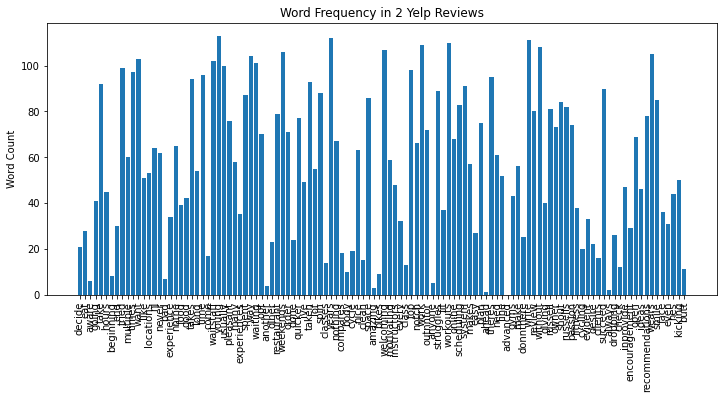

In [18]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews')
plt.ylabel('Word Count')
plt.show()

In [19]:
# TFIDF- Term Frequency Inverse Document Frequency: how frequently a word appears among all lines of text. ALso to find unique words
from sklearn.feature_extraction.text import TfidfVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

#summary
print('List of unique Words: ',Tvectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',Tvector.shape)
print('')
print(Tvector.toarray())

List of unique Words:  {'decide': 21, 'eat': 28, 'aware': 6, 'going': 41, 'take': 92, 'hours': 45, 'beginning': 8, 'end': 30, 'tried': 99, 'multiple': 60, 'times': 97, 'want': 103, 'like': 51, 'locations': 53, 'nj': 64, 'never': 62, 'bad': 7, 'experience': 34, 'nnthe': 65, 'food': 39, 'good': 42, 'takes': 94, 'long': 54, 'time': 96, 'come': 17, 'waitstaff': 102, 'young': 113, 'usually': 100, 'pleasant': 76, 'many': 58, 'experiences': 35, 'spent': 87, 'way': 104, 'waiting': 101, 'opt': 70, 'another': 4, 'diner': 23, 'restaurant': 79, 'weekends': 106, 'order': 71, 'done': 24, 'quicker': 77, 'ive': 49, 'taken': 93, 'lot': 55, 'spin': 88, 'classes': 14, 'years': 112, 'nothing': 67, 'compares': 18, 'body': 10, 'cycle': 19, 'nice': 63, 'clean': 15, 'space': 86, 'amazing': 3, 'bikes': 9, 'welcoming': 107, 'motivating': 59, 'instructors': 48, 'every': 32, 'class': 13, 'top': 98, 'notch': 66, 'work': 109, 'outnnfor': 72, 'anyone': 5, 'struggles': 89, 'fit': 37, 'workouts': 110, 'online': 68, 's

In [20]:
#Bigrams 
text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'decide': 47, 'eat': 61, 'aware': 14, 'going': 87, 'take': 192, 'hours': 95, 'beginning': 18, 'end': 65, 'tried': 206, 'multiple': 128, 'times': 202, 'want': 215, 'like': 107, 'locations': 112, 'nj': 136, 'never': 132, 'bad': 16, 'experience': 73, 'nnthe': 138, 'food': 83, 'good': 89, 'takes': 196, 'long': 114, 'time': 200, 'come': 38, 'waitstaff': 213, 'young': 237, 'usually': 208, 'pleasant': 160, 'many': 123, 'experiences': 75, 'spent': 182, 'way': 217, 'waiting': 211, 'opt': 148, 'another': 9, 'diner': 51, 'restaurant': 165, 'weekends': 223, 'order': 150, 'done': 53, 'quicker': 162, 'decide eat': 48, 'eat aware': 62, 'aware going': 15, 'going take': 88, 'take hours': 193, 'hours beginning': 96, 'beginning end': 19, 'end tried': 66, 'tried multiple': 207, 'multiple times': 129, 'times want': 203, 'want like': 216, 'like locations': 108, 'locations nj': 113, 'nj never': 137, 'never bad': 133, 'bad experience': 17, 'experience nnthe': 74, 'nnthe food': 139, 'fo

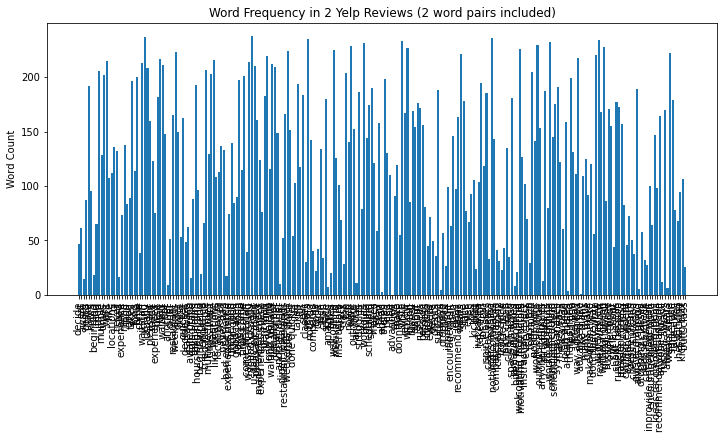

In [21]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews (2 word pairs included)')
plt.ylabel('Word Count')
plt.show()

In [22]:

text = yelp_data_s['No_Stop_Words:Sentence'][0:3]
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=2)
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'like': 2, 'good': 1, 'long': 3, 'many': 4, 'way': 5, 'diner': 0}

Shape of the Sparse Matrix  (3, 6)

[[1 1 1 2 1 1]
 [0 0 1 0 1 2]
 [1 2 0 1 0 0]]


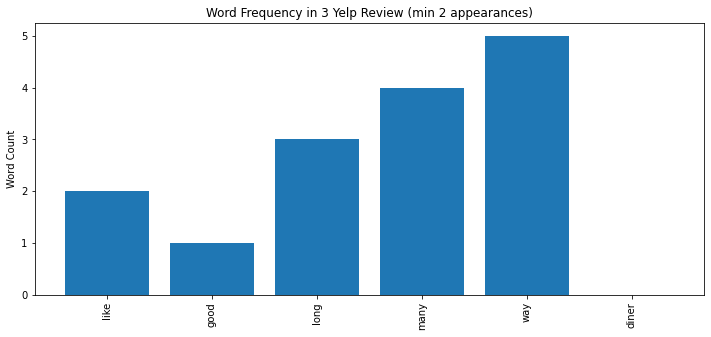

In [23]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 3 Yelp Review (min 2 appearances)')
plt.ylabel('Word Count')
plt.show()

In [24]:
# Creating a training dataset
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

In [ ]:
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='Name'
col_name2 = 'Review'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_P'

col1 = yelp_data_s['user_id']
col2 = yelp_data_s['text']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']
col5 = yelp_data_s['Positive_Words_P']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)
df.insert(4,col_name5,col5)